In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
plt.style.use('ggplot')
plt.rc('font',family='Times New Roman')
plt.style.use('ggplot')
plt.rc('font',family='Times New Roman')
font_path = "/Users/hanzhongxuan/Desktop/仿宋GB2312.ttf"
my_font = fm.FontProperties(fname=font_path, weight='bold',size=22) 
my_font_legend = fm.FontProperties(fname=font_path, weight='bold', size=20) 
english_font = fm.FontProperties(family="Times New Roman", weight='bold')  # 只用于英文
plt.rcParams['font.family'] = my_font.get_name()  # 直接使用字体名称
plt.rcParams['axes.unicode_minus'] = False  # 解决负号问题
plt.rcParams['pdf.fonttype'] = 42  # 让 PDF 直接嵌入 TrueType 字体
plt.rcParams['ps.fonttype'] = 42   # 兼容 PostScript

In [7]:
# 根据result_summation 整理出的
df = pd.read_excel("./dataset_stat_core.xlsx",
                   sheet_name="variational_percentage")
save_path = "/Users/hanzhongxuan/Documents/毕业论文/"


In [8]:
df_normal = df[df['mode'] == 'normal']
df_fair = df[df['mode'] == 'fair_v3']

row_num = len(df)

df_performance = pd.DataFrame({
    'percentage':list(df['percentage']) * 2,
    'mode': list(df['mode']) * 2,
    'metric': ['HR@10'] * row_num + ['NDCG@10'] * row_num ,
    'performance': list(df['hit10(all)'])  + list(df['ndcg10(all)']),
})

df_fairness_metric = pd.DataFrame({
    'percentage':list(df['percentage']) * 2,
    'mode': list(df['mode']) * 2,
    'metric':  ['HR@10'] * row_num + ['NDCG@10'] * row_num,
    '$M_{UOF}$': list(df['M_hit']) +  list(df['M_ndcg']),
})

In [10]:
df_performance

,percentage,mode,metric,performance
0,0.05,II-GOOT,HR@10,0.503178
1,0.05,original,HR@10,0.485559
2,0.10,II-GOOT,HR@10,0.497716
3,0.10,original,HR@10,0.481314
4,0.15,II-GOOT,HR@10,0.498632
5,0.15,original,HR@10,0.482306
6,0.20,II-GOOT,HR@10,0.501885
7,0.20,original,HR@10,0.491321
8,0.25,II-GOOT,HR@10,0.500287
9,0.25,original,HR@10,0.479130


findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: Font family 'calibri' not found.
findfont: F

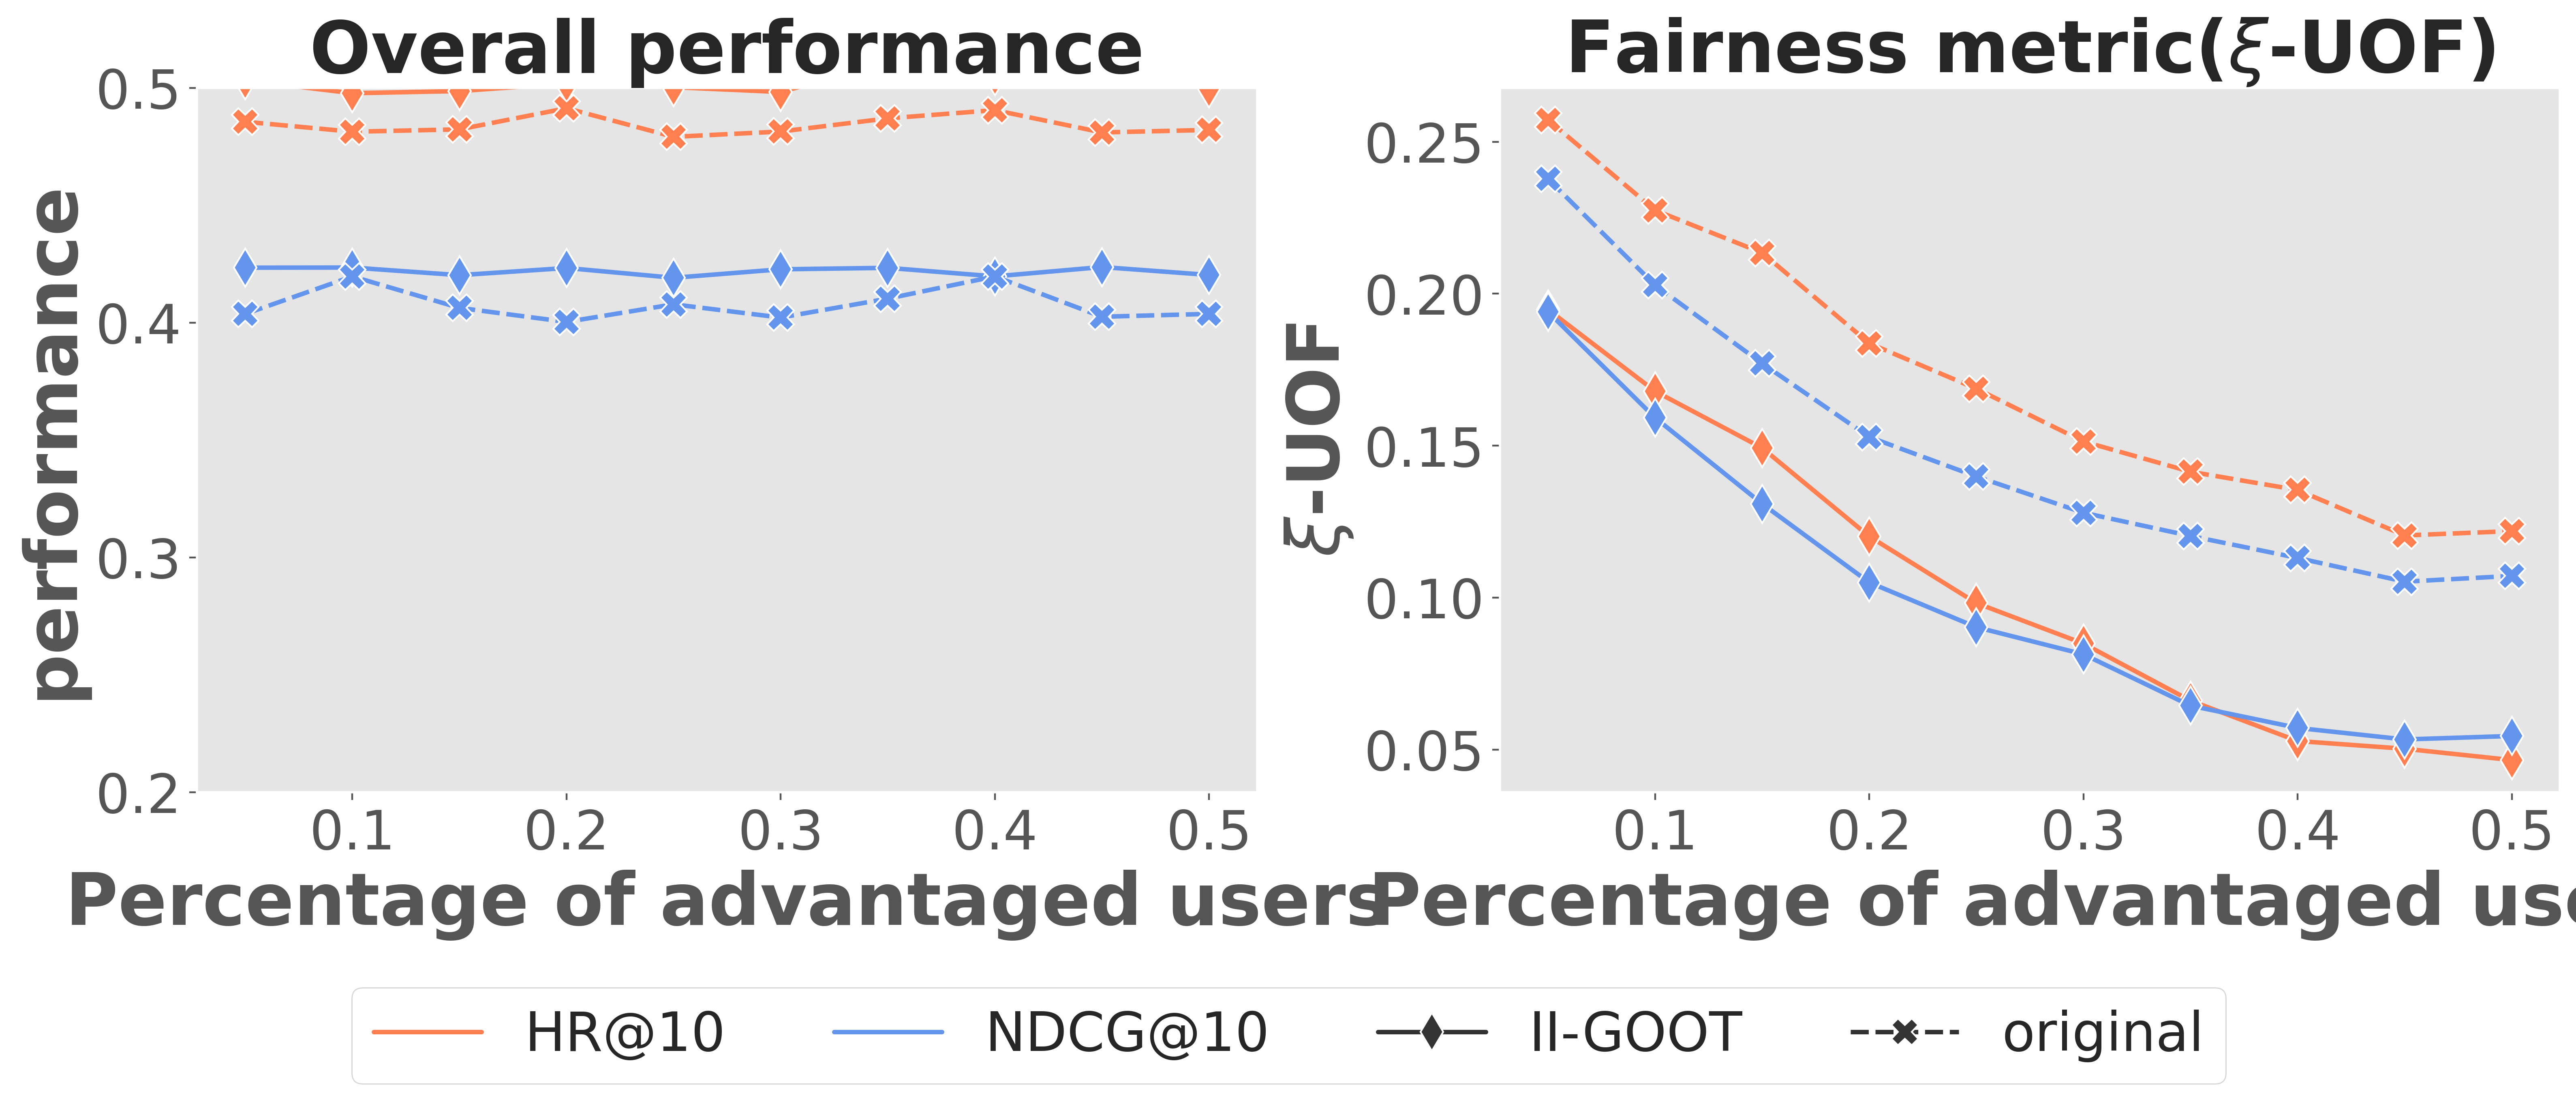

In [9]:
palette_aaai_2024 = ["coral", "cornflowerblue"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=400)
sns.set_style("ticks")

legend_font = {
    'family': 'calibri',  # 字体
    'size': 24,  # 字号,
}

sns.lineplot( data=df_performance, 
             x='percentage', 
             y='performance',  
             style='mode', 
             ax=axes[0],
             linewidth=2,
             hue='metric',
             markers=['d', 'X'],
             markersize=12,
             palette=palette_aaai_2024)

axes[0].set_title("Overall performance", fontdict={'family' : 'calibri', 'size'   : 32, 'weight': 'bold'})
axes[0].set_ylabel('performance', fontdict={'family' : 'calibri', 'size'   : 32, 'weight': 'bold'})
axes[0].set_xlabel('Percentage of advantaged users', fontdict={'family' : 'calibri', 'size'   : 32, 'weight': 'bold'})

x_ticks = [0.1, 0.2, 0.3, 0.4, 0.5]
ticks = axes[0].set_xticks(list(np.arange(0.1, 0.55, 0.1))) 
labels = axes[0].set_xticklabels(x_ticks,size =16, fontproperties = 'calibri',) 

axes[0].set_ylim((0.2, 0.5))
ticks = axes[0].set_yticks(list(np.arange(0.2, 0.55, 0.1)))
y_ticks1 = [0.2, 0.3, 0.4, 0.5]
labels = axes[0].set_yticklabels(y_ticks1, fontsize =16, fontproperties = 'calibri',)
axes[0].grid()



sns.lineplot( data=df_fairness_metric, x='percentage', y='$M_{UOF}$', hue='metric', style='mode', ax=axes[1],
             linewidth=2,
             markers=['d', 'X'],
             markersize=12,
             palette=palette_aaai_2024)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:3] +handles[4:] , labels=labels[1:3]+labels[4:])
axes[1].set_title(r"Fairness metric($\xi$-UOF)", fontdict={'family' : 'calibri', 'size'   : 32, 'weight': 'bold'})
axes[1].set_ylabel(r'$\xi$-UOF', fontdict={'family' : 'calibri', 'size'   : 32, 'weight': 'bold'})
axes[1].set_xlabel('Percentage of advantaged users', fontdict={'family' : 'calibri', 'size'   : 32, 'weight': 'bold'})

ticks = axes[1].set_yticks(list(np.arange(0.05, 0.3, 0.05))) 
y_ticks2 = ["0.05", "0.10", "0.15", '0.20', '0.25']
labels = axes[1].set_yticklabels(y_ticks2, fontsize =32, fontproperties = 'calibri',) 

x_ticks = [0.1, 0.2, 0.3, 0.4, 0.5]
ticks = axes[1].set_xticks(list(np.arange(0.1, 0.55, 0.1)))
labels = axes[1].set_xticklabels(x_ticks,size =16, fontproperties = 'calibri',)
axes[1].grid()

axes[0].tick_params(axis='x',labelsize=24,) 
axes[0].tick_params(axis='y',labelsize=24,) 
axes[1].tick_params(axis='x',labelsize=24,) 
axes[1].tick_params(axis='y',labelsize=24,) 

# 统一图例
lines, labels = axes[-1].get_legend_handles_labels()
lines = lines[1:3] + lines[4:]
labels = labels[1:3] + labels[4:]
fig.legend(lines, labels, loc = 'lower center', ncol=4, prop=legend_font,bbox_to_anchor=(0.5, -0.15)) # 图例的位置，bbox_to_anchor=(0.5, 0.92),
axes[1].get_legend().remove()
axes[0].get_legend().remove()



plt.tight_layout()
# plt.savefig(os.path.join(save_path, f"variational_percentage_hit.png"))
